In [50]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import signal
import cv2
import glob
from tools import WeightedMedianFilter
from tools import GetCLAHE

(3168, 4752, 3)
(3168, 4752)


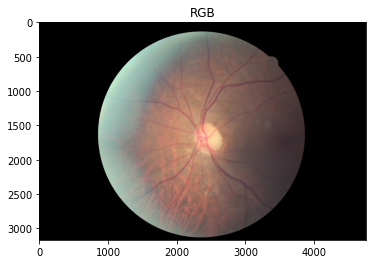

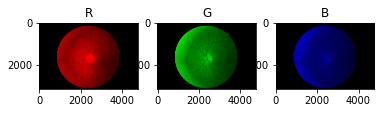

In [51]:
img  = cv2.imread('sample/10_left.jpeg')
lena = cv2.imread('lena.tif')

# get b g r from cv2
b_channel, g_channel, r_channel = cv2.split(img)
print(img.shape)
print(r_channel.shape)

# merge r g b for plt       
imgRGB = cv2.merge((r_channel, g_channel, b_channel))
plt.imshow(imgRGB)
plt.title('RGB')
plt.show()

# fill with zero in other channel to plot image
z = np.zeros((imgRGB.shape[0], imgRGB.shape[1]), dtype=np.uint8)

r_img = cv2.merge((r_channel,z,z))
g_img = cv2.merge((z,g_channel,z))
b_img = cv2.merge((z,z,b_channel))

plt.subplot(1,3,1); plt.imshow(r_img); plt.title('R')
plt.subplot(1,3,2); plt.imshow(g_img); plt.title('G')
plt.subplot(1,3,3); plt.imshow(b_img); plt.title('B')
plt.show()

Apply Weighted Median Filter Denoising

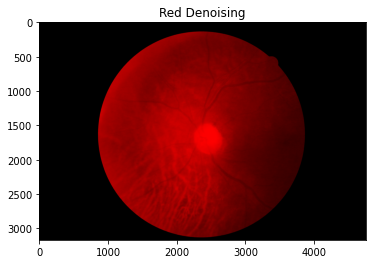

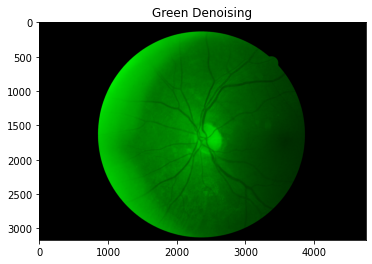

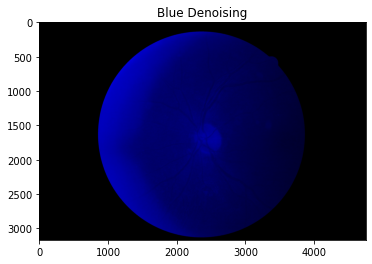

In [52]:
weight = [[1,1,1],
          [1,1,1],
          [1,1,1]]

weight = np.array(weight, dtype=np.uint8)

### RED DENOISING
r_WMF = WeightedMedianFilter(r_channel, weight)
r_WMF = np.array(r_WMF, dtype=np.uint8)

r_WMF_PLOT = cv2.merge((r_WMF,z,z))
plt.imshow(r_WMF_PLOT)
plt.title('Red Denoising')
plt.show()

### GREEN DENOISING
g_WMF = WeightedMedianFilter(g_channel, weight)
g_WMF = np.array(g_WMF, dtype=np.uint8)

g_WMF_PLOT = cv2.merge((z,g_WMF,z))
plt.imshow(g_WMF_PLOT)
plt.title('Green Denoising')
plt.show()

### BLUE DENOISING
b_WMF = WeightedMedianFilter(b_channel, weight)
b_WMF = np.array(b_WMF, dtype=np.uint8)

b_WMF_PLOT = cv2.merge((z,z,b_WMF))
plt.imshow(b_WMF_PLOT)
plt.title('Blue Denoising')
plt.show()

Apply CLAHE

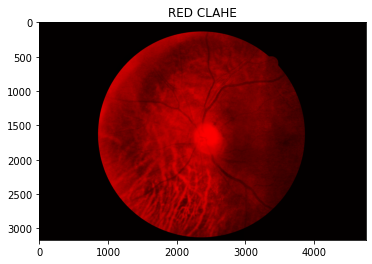

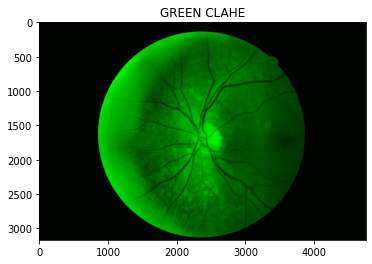

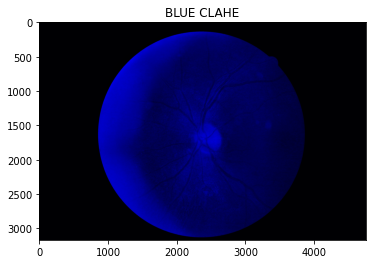

In [60]:
### RED CLAHE
r_CLH = GetCLAHE(r_WMF)

r_CLH_PLOT = cv2.merge((r_CLH,z,z))
plt.imshow(r_CLH_PLOT)
plt.title('RED CLAHE')
plt.show()

### GREEN CLAHE
g_CLH = GetCLAHE(g_WMF)

g_CLH_PLOT = cv2.merge((z,g_CLH,z))
plt.imshow(g_CLH_PLOT)
plt.title('GREEN CLAHE')
plt.show()

### BLUE CLAHE
b_CLH = GetCLAHE(b_WMF)

b_CLH_PLOT = cv2.merge((z,z,b_CLH))
plt.imshow(b_CLH_PLOT)
plt.title('BLUE CLAHE')
plt.show()

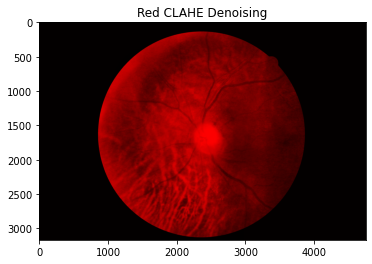

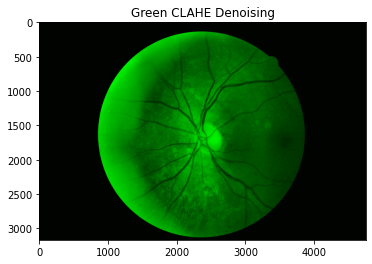

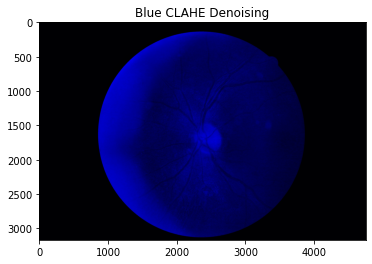

In [61]:
weight = [[1,1,1],
          [1,1,1],
          [1,1,1]]

weight = np.array(weight, dtype=np.uint8)

### RED DENOISING
r_WMF = WeightedMedianFilter(r_CLH, weight)
r_WMF = np.array(r_WMF, dtype=np.uint8)

r_WMF_PLOT = cv2.merge((r_WMF,z,z))
plt.imshow(r_WMF_PLOT)
plt.title('Red CLAHE Denoising')
plt.show()

### GREEN DENOISING
g_WMF = WeightedMedianFilter(g_CLH, weight)
g_WMF = np.array(g_WMF, dtype=np.uint8)

g_WMF_PLOT = cv2.merge((z,g_WMF,z))
plt.imshow(g_WMF_PLOT)
plt.title('Green CLAHE Denoising')
plt.show()

### BLUE DENOISING
b_WMF = WeightedMedianFilter(b_CLH, weight)
b_WMF = np.array(b_WMF, dtype=np.uint8)

b_WMF_PLOT = cv2.merge((z,z,b_WMF))
plt.imshow(b_WMF_PLOT)
plt.title('Blue CLAHE Denoising')
plt.show()

(3168, 4752, 3)


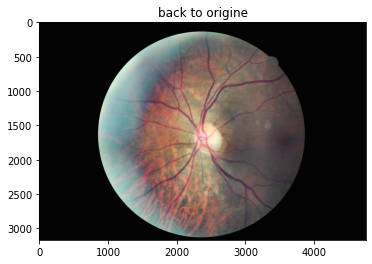

In [62]:
back_to_origine = cv2.merge((r_WMF,g_WMF,b_WMF))
print(back_to_origine.shape)
plt.imshow(back_to_origine)
plt.title('back to origine')
plt.show()